# Solar Panel Exploratory Analysis - Chinmay Gharpure

In [2]:
#This code is to import the relevant Python libraries for the data analysis and visualizations.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime

## Overview of the Data

The data consists of energy measurements(kWh) at each hour during each day of 2017. There are energy measurements for the solar generation, home load, battery state of charge, and home net load. These quantities are measured by meters labelled 1 through 4, respectively.   

## Step 1 - Reading and Labelling the Data Set with the Pandas Library

In [3]:
solarData = pd.read_csv("/Users/yamnihcg/Downloads/SolarPanelData.csv")
solarData.columns = ["Hour", "Date and Time", "Solar Generation", "Home Load", "Battery State of Charge", "Home Net Load"]
print(solarData.tail(10))

      Hour   Date and Time  Solar Generation  Home Load  \
8750  8750  12/31/17 14:00          0.997462   1.142506   
8751  8751  12/31/17 15:00          1.070619   0.670382   
8752  8752  12/31/17 16:00          1.278346   0.148886   
8753  8753  12/31/17 17:00          1.586794   0.000000   
8754  8754  12/31/17 18:00          1.735477   0.000000   
8755  8755  12/31/17 19:00          1.653825   0.000000   
8756  8756  12/31/17 20:00          1.576369   0.000000   
8757  8757  12/31/17 21:00          1.442547   0.000000   
8758  8758  12/31/17 22:00          1.213622   0.000000   
8759  8759  12/31/17 23:00          0.976102   0.000000   

      Battery State of Charge  Home Net Load  
8750                 7.423545      -0.116482  
8751                 7.423545       0.416996  
8752                 7.423545       1.133182  
8753                 7.423545       1.586794  
8754                 7.423545       1.735477  
8755                 7.423545       1.653825  
8756                 

## Step 2 - Trends, Visualizations and Statistics of the Data


Every day, the home load is nonzero from 7 am - 4 pm. For 290 days in the year, the home load is nonzero during 6 am and 5 pm. For 159 days in the year, the home load is nonzero during 5 am and 6 pm.



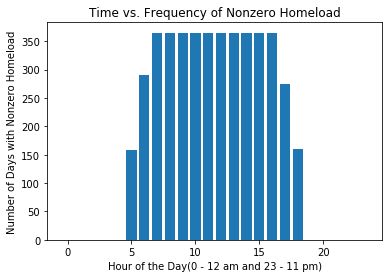

In [4]:
#Code for Trend 1
#Converts hour into conventional time(ex: 7 am, 2 pm) during a given day
timeClassification = [0] * 24
weekDayArray = [0] * 7
hourColumn = solarData["Hour"]
for i in range(len(hourColumn)):
    if(solarData["Home Load"][i] > 0):
        temp = i % 24
        timeClassification[temp] = timeClassification[temp] + 1

#Generating Histogram 1 using Matplotlib
plt.bar(np.arange(24), timeClassification)
plt.xlabel("Hour of the Day(0 - 12 am and 23 - 11 pm)")
plt.ylabel("Number of Days with Nonzero Homeload")
plt.title("Time vs. Frequency of Nonzero Homeload")
plt.show()



        


        
        


There is a negative net homeload for the large majority of the days from 12 pm to 3 pm. There is no negative net homeload for any day of the year between 12 am to 6 am and 5 pm to 11 pm.

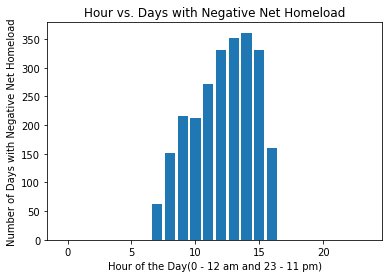

In [5]:
hourClassification = [0] * 24
for i in range(len(hourColumn)):
    if(solarData["Home Net Load"][i] < 0):
        temp = i % 24
        hourClassification[temp] = hourClassification[temp] + 1
plt.bar(np.arange(24), hourClassification)
plt.xlabel("Hour of the Day(0 - 12 am and 23 - 11 pm)")
plt.ylabel("Number of Days with Negative Net Homeload")
plt.title("Hour vs. Days with Negative Net Homeload")
plt.show()

When the home load is zero, the solar generation and the home net load are equal to each other. A visualization of this fact is the data fits the line y = x. 


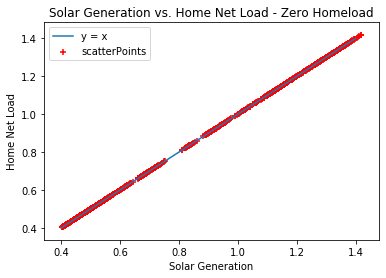

In [6]:
#Part 1 - Getting the relevant points 
homeLoad = solarData["Home Load"]
batterySOC = solarData["Battery State of Charge"]
solarGeneration = solarData["Solar Generation"]
netLoad = solarData["Home Net Load"]
utilCount = 0
for k in range(len(homeLoad)):
    if(homeLoad[k] == 0 and batterySOC[k] == 0):
        utilCount = utilCount + 1
netLoadPts = [0] * utilCount
generationPts = [0] * utilCount
reference = 0
#and batterySOC[a] == 0
for a in range(len(homeLoad)):
    if(homeLoad[a] == 0 and batterySOC[a] == 0):
        netLoadPts[reference] = solarGeneration[a]
        generationPts[reference] = netLoad[a]
        reference = reference + 1

#Part 2 - Creating a scatter plot and a regression
#Generating a y = x line to compare the scatter plot of the SolarGeneration and NetLoad values
dummyX = np.linspace(0.4, 1.4, 11)
dummyY = np.linspace(0.4, 1.4, 11)
plt.scatter(generationPts, netLoadPts, c='r',marker='+', label="scatterPoints")
plt.plot(dummyX, dummyY, label="y = x")
plt.xlabel("Solar Generation")
plt.ylabel("Home Net Load")
plt.title("Solar Generation vs. Home Net Load - Zero Homeload")
plt.legend(loc='upper left')
plt.show()

Interesting Statistic - When the battery state of charge has a constant value of 7.44 or 7.423545, the difference between the solar generation and homeload is close to the home net load value for that given hour. In fact, the average percent error between the two quantities is ~ 2.48%

In [7]:
criteriaCount = 0
for d in range(len(homeLoad)):
    if((batterySOC[d] == 7.44 or batterySOC[d] == 7.423545458) and not (homeLoad[d] == 0)):
        criteriaCount = criteriaCount + 1
percentErrors = [0] * criteriaCount
criteriaCount = 0
for d in range(len(homeLoad)):
    if((batterySOC[d] == 7.44 or batterySOC[d] == 7.423545458) and not (homeLoad[d] == 0)):
        tempDiff = (solarGeneration[d] - homeLoad[d]) - netLoad[d]
        percentError = tempDiff / netLoad[d]
        percentErrors[criteriaCount] = percentError
        criteriaCount = criteriaCount + 1
percentError = (sum(percentErrors) / len(percentErrors)) * 100

print("The percent error between the difference between solar generation and home load and the net load is", percentError, "%")

The percent error between the difference between solar generation and home load and the net load is 2.475272778242927 %


The battery state of charge is a constant value of 7.44 at the end of the first ~150 days of the year, and 7.42 at the end of the last ~40 days of the year. Starting June 1st, the battery state of charge alternates between a value of 0 and random positive numbers until November 1st. 

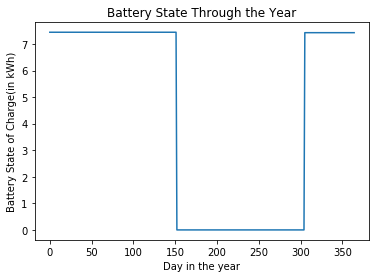

In [8]:
batteryState = solarData["Battery State of Charge"]
endOfDayMeasurements = [0] * 365
count = 0
for j in range(len(batteryState)):
    if(j % 24 == 0): 
        endOfDayMeasurements[count] = batteryState[j]
        count = count + 1
#Basic line plot using Matplotlib   
plt.plot(endOfDayMeasurements)
plt.xlabel("Day in the year")
plt.ylabel("Battery State of Charge(in kWh)")
plt.title('Battery State Through the Year')
plt.show()


 

## Maximums and Minimums

I wrote some code to convert the formal calendar date to the day of the week using the Python datetime library. 0 corresponds to a Sunday, 1 corresponds to a Monday, so on and so forth.

1) The maximum solar generation value occurs on Friday, December 2nd, 2017 at 6:00 pm. This value is 1.7371515. The minimum solar generation value occurs on Thursday, June 23, 2017. This value is 0.403404645.

2) The maximum net load value occurs on Friday, December 2nd, 2017 at 6:00 pm. This is the same as the maximum solar generation value. This value is 1.7371515. The minimum net load value occurs on Thursday June 9, 2017. This value is -6.761981132. 



In [9]:
#Getting the days of the week
# 0 - Sunday, 1 - Monday, 2 - Tuesday ... 6 - Saturday
weekDayInfo = []
counter = 0;
dateTime = solarData["Date and Time"]
for i in range(len(dateTime)):
    temp = 0
    for j in range(len(dateTime[i])):
        if(dateTime[i][j] == ' '):
            temp = dateTime[i][0:j]
    formatDate = '-'.join(temp.split('/')[::-1])
    splitter = formatDate.split('-')
    day = datetime.datetime(int(splitter[0]) + 2000, int(splitter[2]), int(splitter[1]))
    weekDay = day.weekday()
    weekDayInfo.append(weekDay)


solarGeneration = solarData["Solar Generation"]
netLoad = solarData["Home Net Load"]
dateNTime = solarData["Date and Time"]

#Interesting Statistic 1

tempMax = max(solarGeneration)
tempMin = min(solarGeneration)
maxInd = 0
minInd = 0
for i in range(len(solarGeneration)):
    if(solarGeneration[i] == tempMax):
        maxInd = i
    if(solarGeneration[i] == tempMin):
        minInd = i
print(dateNTime[maxInd], "which is a", weekDayInfo[maxInd])
print(dateNTime[minInd], "which is a", weekDayInfo[minInd])
print(tempMax)
print(tempMin)

#Interesting Statistic 2
tempMax = max(netLoad)
tempMin = min(netLoad)
maxInd = 0
minInd = 0
for i in range(len(netLoad)):
    if(netLoad[i] == tempMax):
        maxInd = i
    if(netLoad[i] == tempMin):
        minInd = i
print(dateNTime[maxInd], "which is a", weekDayInfo[maxInd])
print(dateNTime[minInd], "which is a", weekDayInfo[minInd])
print(tempMax)
print(tempMin)





12/2/17 18:00 which is a 5
6/23/17 2:00 which is a 4
1.7371515
0.403404645
12/2/17 18:00 which is a 5
6/9/17 14:00 which is a 4
1.7371515
-6.761981132000001
